In [46]:
import h5py

use_channel = 
with h5py.File("/home/chekirou/Documents/SOLI/SoliData/dsp/0_0_0.h5", 'r') as f:
    # Data and label are numpy arrays
    data = f['ch{}'.format(use_channel)][()]
    label = f['label'][()]

In [47]:
import matplotlib.pyplot as plt

In [48]:
data = data.reshape((data.shape[0], 32,32))

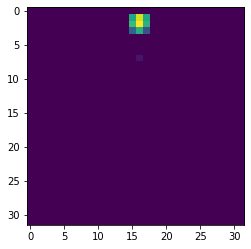

In [49]:

plt.imshow(data[0])
plt.show()

In [7]:
label[5][0]

1

In [1]:
import torch.nn

In [8]:
m = torch.nn.Softmax(dim=0)
input = torch.randn(2,3)
output = m(input)

In [9]:
output

tensor([[0.3346, 0.0495, 0.0689],
        [0.6654, 0.9505, 0.9311]])

In [ ]:
def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features